In [7]:
import numpy as np, healpy as hp, curvedsky, misctools, prjlib
from matplotlib.pyplot import *

In [10]:
pL  = prjlib.init_analysis(wtype='Lmask')
pG  = prjlib.init_analysis(wtype='G60')
pGL = prjlib.init_analysis(wtype='G60Lmask')
nside = 2048
ascale = 1. # 5deg apodization to Galactic mask

CMB mask

In [9]:
# G60 x Lmask
if not misctools.check_path(pGL.fmask):
    G60   = hp.fitsfunc.read_map(pGL.fmask_Gfsky,field=2,verbose=False)
    Lmask = hp.fitsfunc.read_map(pL.fmask,verbose=False)
    hp.fitsfunc.write_map(pGL.fmask,G60*Lmask,overwrite=True)
    hp.mollview(G60*Lmask)

/global/cscratch1/sd/toshiyan/plk/mask/Lensing_mask_with_HFI_GAL060.fits exist and is not overwritten


Apodization

In [11]:
for wtype, gal in [('Lmask',3),('G60',2),('G60Lmask',2)]: #index is G70 or G60
    p = prjlib.init_analysis(wtype=wtype,ascale=ascale)
    if not misctools.check_path(p.famask,overwrite=True):
        if wtype in ['G60']:
            amask = 1.
        else:
            mask = hp.fitsfunc.read_map(p.fmask,verbose=False)
            amask = curvedsky.utils.apodize(nside,mask,.5) # apodize original mask
        Gmask = hp.fitsfunc.read_map(p.fmask_Gfsky,field=gal,verbose=False) 
        Amask = curvedsky.utils.apodize(nside,Gmask,ascale) # apodize Galactic mask
        hp.fitsfunc.write_map(p.famask,amask*Amask,overwrite=True)

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
effective sky area 0.5694703651914398
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
effective sky area 0.555853136785175
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
effective sky area 0.49187785678346524


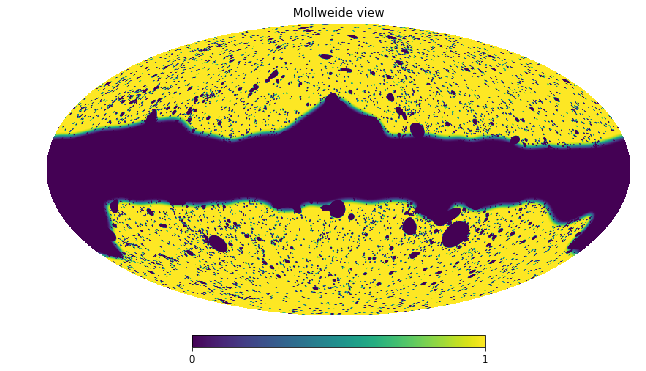

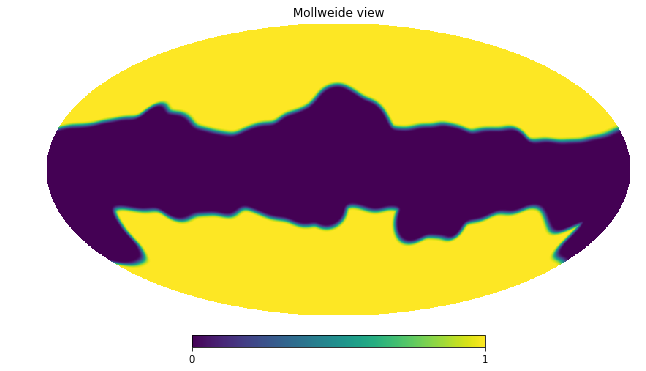

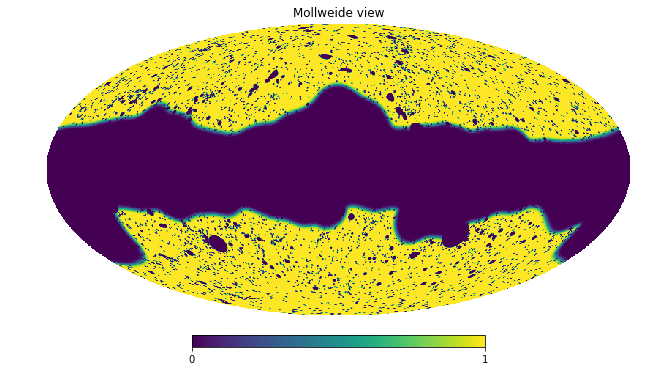

In [7]:
for wtype in ['Lmask','G60','G60Lmask']:
    p = prjlib.init_analysis(wtype=wtype,ascale=ascale)
    #mask = hp.fitsfunc.read_map(p.fmask)
    #print('effective sky area',np.mean(mask))
    amask = hp.fitsfunc.read_map(p.famask,verbose=False)
    print('effective sky area',np.mean(amask))
    #hp.mollview(mask)
    hp.mollview(amask)

In [5]:
Lmask = hp.fitsfunc.read_map('../data/plk/old/public/mask_Lmask1.fits')

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


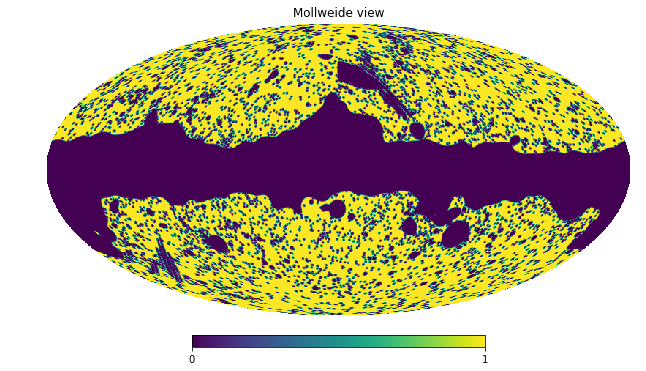

In [6]:
hp.mollview(Lmask)